In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Завантаження даних
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Модель RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))

# Модель двостороння RNN
model_bidirectional_rnn = Sequential()
model_bidirectional_rnn.add(Embedding(max_features, 128))
model_bidirectional_rnn.add(Bidirectional(SimpleRNN(64)))
model_bidirectional_rnn.add(Dense(1, activation='sigmoid'))

# Модель глубока RNN
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 128))
model_deep_rnn.add(SimpleRNN(64, return_sequences=True))
model_deep_rnn.add(SimpleRNN(64))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

# Модель LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))

# Модель двостороння LSTM
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(max_features, 128))
model_bidirectional_lstm.add(Bidirectional(LSTM(64)))
model_bidirectional_lstm.add(Dense(1, activation='sigmoid'))

# Модель глубока LSTM
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 128))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(LSTM(64))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
# Компіляція моделі
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidirectional_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_deep_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidirectional_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_deep_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Навчання моделей
history_rnn = model_rnn.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
history_lstm = model_lstm.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
history_bidirectional_lstm = model_bidirectional_lstm.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
history_bidirectional_rnn = model_bidirectional_rnn.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
history_deep_rnn = model_deep_rnn.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 113s 570ms/step - loss: 0.6697 - accuracy: 0.5691 - val_loss: 0.6345 - val_accuracy: 0.6198
Epoch 2/5
196/196 [==============================] - 106s 539ms/step - loss: 0.5950 - accuracy: 0.6912 - val_loss: 0.5905 - val_accuracy: 0.6755
Epoch 3/5
196/196 [==============================] - 104s 531ms/step - loss: 0.4629 - accuracy: 0.7796 - val_loss: 0.5425 - val_accuracy: 0.7387
Epoch 4/5
196/196 [==============================] - 98s 497ms/step - loss: 0.4831 - accuracy: 0.7636 - val_loss: 0.6103 - val_accuracy: 0.6678
Epoch 5/5
196/196 [==============================] - 101s 515ms/step - loss: 0.3997 - accuracy: 0.8188 - val_loss: 0.4988 - val_accuracy: 0.7829
Epoch 1/5
196/196 [==============================] - 28s 130ms/step - loss: 0.4696 - accuracy: 0.7658 - val_loss: 0.3278 - val_accuracy: 0.8586
Epoch 2/5
196/196 [==============================] - 20s 104ms/step - loss: 0.2543 - accuracy: 0.9002 - val_loss: 0.3320 - val_accur

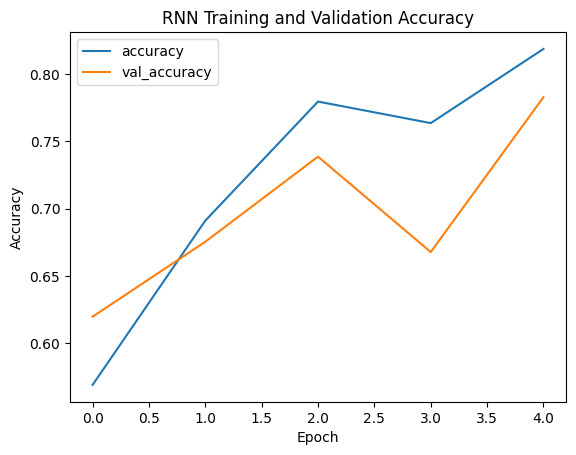

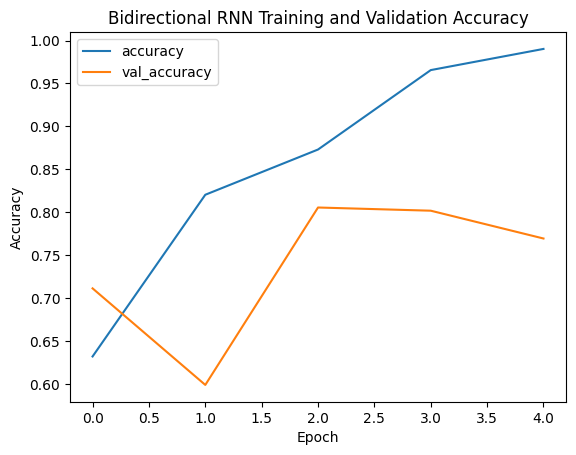

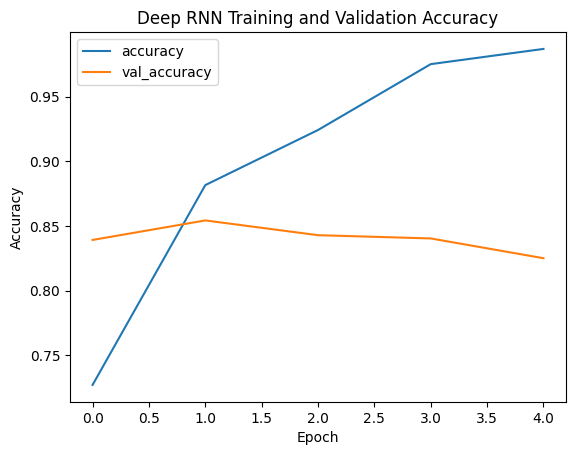

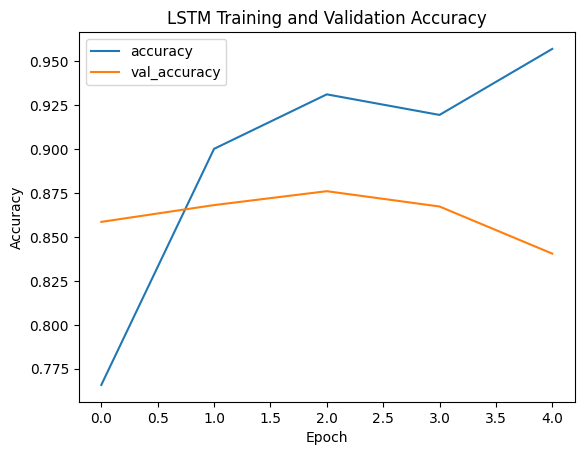

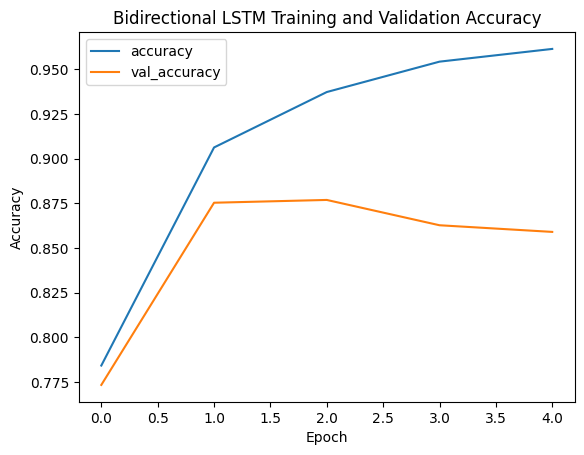

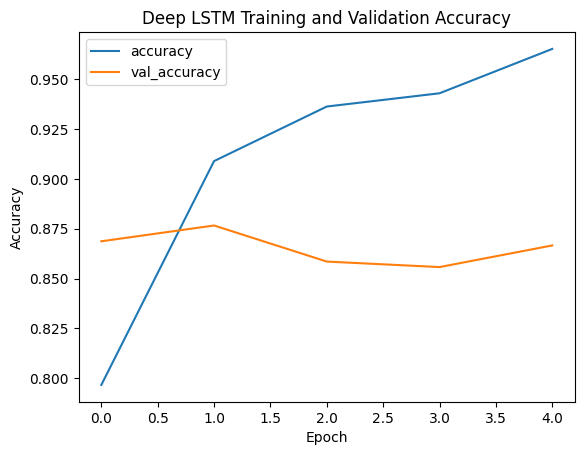

In [ ]:
# Побудова графіків
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history_rnn, 'RNN Training and Validation Accuracy')
plot_training_history(history_bidirectional_rnn, 'Bidirectional RNN Training and Validation Accuracy')
plot_training_history(history_deep_rnn, 'Deep RNN Training and Validation Accuracy')
plot_training_history(history_lstm, 'LSTM Training and Validation Accuracy')
plot_training_history(history_bidirectional_lstm, 'Bidirectional LSTM Training and Validation Accuracy')
plot_training_history(history_deep_lstm, 'Deep LSTM Training and Validation Accuracy')

## **Висновок**

Для кожної моделі виконано тренування протягом 5 епох та отримано наступні результати:

In [ ]:
# Оцінка моделей
scores_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
scores_bidirectional_rnn = model_bidirectional_rnn.evaluate(x_test, y_test, verbose=0)
scores_deep_rnn = model_deep_rnn.evaluate(x_test, y_test, verbose=0)
scores_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
scores_bidirectional_lstm = model_bidirectional_lstm.evaluate(x_test, y_test, verbose=0)
scores_deep_lstm = model_deep_lstm.evaluate(x_test, y_test, verbose=0)

print("RNN Accuracy:", scores_rnn[1])
print("Bidirectional RNN Accuracy:", scores_bidirectional_rnn[1])
print("Deep RNN Accuracy:", scores_deep_rnn[1])
print("LSTM Accuracy:", scores_lstm[1])
print("Bidirectional LSTM Accuracy:", scores_bidirectional_lstm[1])
print("Deep LSTM Accuracy:", scores_deep_lstm[1])

RNN Accuracy: 0.7829200029373169
Bidirectional RNN Accuracy: 0.769599974155426
Deep RNN Accuracy: 0.8250399827957153
LSTM Accuracy: 0.8405600190162659
Bidirectional LSTM Accuracy: 0.858959972858429
Deep LSTM Accuracy: 0.866599977016449
